### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [93]:
import numpy as np
import pandas as pd
# 1.
df = pd.read_csv('data/ecommerce_sales_data.csv')
df.head()

#2.
print(df.isnull().values.any())
filtered = df.dropna()
print(filtered.isnull().values.any())

#3.
print(filtered.dtypes)
filtered['OrderDate'] = pd.to_datetime(filtered['OrderDate'])
print(filtered.dtypes)

True
False
OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object
OrderID                  int64
Product                 object
Category                object
Quantity                 int64
Price                    int64
CustomerID               int64
Birthdate               object
OrderDate       datetime64[ns]
Country                 object
DiscountRate           float64
dtype: object


C:\Users\whene\AppData\Local\Temp\ipykernel_10268\1623025813.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['OrderDate'] = pd.to_datetime(filtered['OrderDate'])


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [ ]:
# 1.
# filtered['TotalRevenue'] = filtered['Quantity'] * filtered['Price']
# 2. 
# filtered.set_index('OrderDate', inplace=True)
# monthly_revenue = filtered['TotalRevenue'].resample('M').sum()
# 3.
category_groupby = filtered.groupby('Category')['TotalRevenue'].sum() # sum 으로 인해 groupby 객체가 Series 객체로 변하고 sort_values 적용
category_groupby.sort_values(ascending=False).iloc[:3]
# 4.
country_groupby = filtered.groupby('Country')['TotalRevenue'].sum()
category_groupby.sort_values(ascending=False).iloc[:5]

C:\Users\whene\AppData\Local\Temp\ipykernel_10268\2856388272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['TotalRevenue'] = filtered['Quantity'] * filtered['Price']
C:\Users\whene\AppData\Local\Temp\ipykernel_10268\2856388272.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = filtered['TotalRevenue'].resample('M').sum()


Category
Food           1801000
Electronics    1746000
Beauty         1493000
Books          1378000
Clothing       1279000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [95]:
# 1.
customer_groupby = filtered.groupby('CustomerID')['TotalRevenue'].sum()
print(customer_groupby.sort_values(ascending=False).iloc[:5])
# 2.
customer_order_groupby = filtered.groupby('CustomerID')['OrderID'].count()
print(customer_order_groupby.sort_values(ascending=False).iloc[:5])
# 3. 가정 - 연령대별 출생년도

age = [1955, 1965, 1975, 1985, 1995, 2005, 2015]
label = [60, 50, 40, 30, 20, 10]
filtered['Birthdate'] = pd.to_datetime(filtered['Birthdate'])
filtered['BirthYear'] = filtered['Birthdate'].dt.year
filtered['AgeCategory'] = pd.cut(filtered['BirthYear'], bins=age, labels=label)

age_groupby = (filtered.groupby(['AgeCategory', 'Category']).size().reset_index(name='Count'))
idx = age_groupby.groupby('AgeCategory')['Count'].idxmax()
result = age_groupby.loc[idx]
print(result)

# birth_groupby['Cartegory'] # Product 별 주문수량 Quantity

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64
CustomerID
1007    2
1038    2
1278    2
1421    2
1206    2
Name: OrderID, dtype: int64
   AgeCategory     Category  Count
3           60  Electronics      3
9           50  Electronics      7
13          40        Books      8
22          30         Food     10
24          20       Beauty      6
30          10       Beauty      0


C:\Users\whene\AppData\Local\Temp\ipykernel_10268\593005715.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Birthdate'] = pd.to_datetime(filtered['Birthdate'])
C:\Users\whene\AppData\Local\Temp\ipykernel_10268\593005715.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['BirthYear'] = filtered['Birthdate'].dt.year
C:\Users\whene\AppData\Local\Temp\ipykernel_10268\593005715.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [96]:
# product랑 quantity 기준으로
# 1.
sold = filtered.groupby('Product')['Quantity'].sum()
sold.sort_values(ascending=False).iloc[:5]
# 2.
category = filtered.groupby(['Category', 'Product'])['Quantity'].sum()
print(category.sort_values(ascending=False).index[0][1])
# 3.
avg_sold = filtered.groupby('Product')['Quantity'].mean()
top3 = avg_sold.sort_values(ascending=False).index[:3]

for item in top3:
    print(item, '', end='')

셔츠
주스 자기계발 요가매트 

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

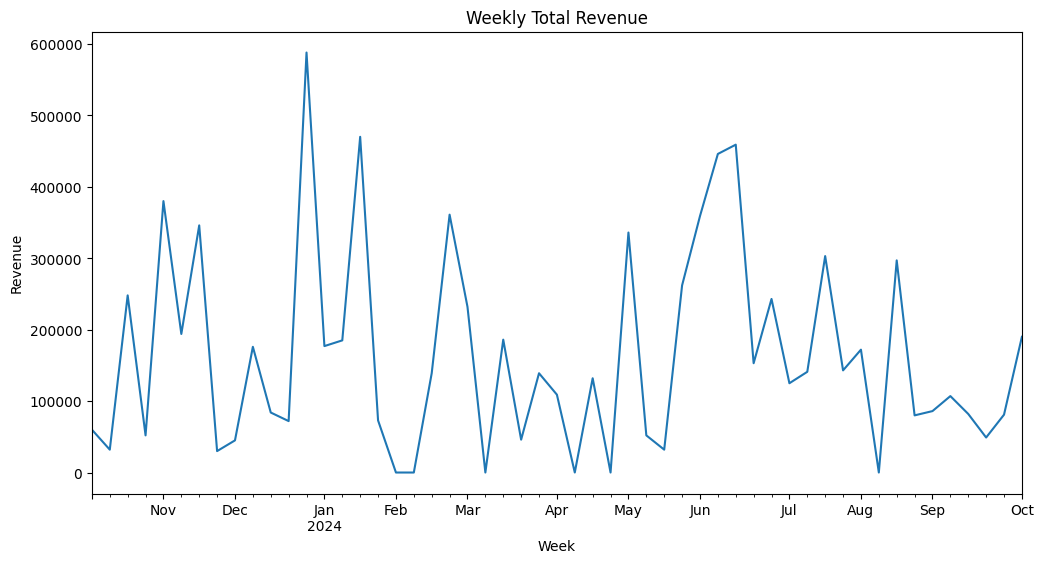

In [108]:
import matplotlib.pyplot as plt
# 1.
weekly_sales = filtered['TotalRevenue'].resample('W').sum()
plt.figure(figsize=(12,6))
weekly_sales.plot()
plt.title('Weekly Total Revenue')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

C:\Users\whene\AppData\Local\Temp\ipykernel_10268\3437076527.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = period_sales.resample('M').sum()


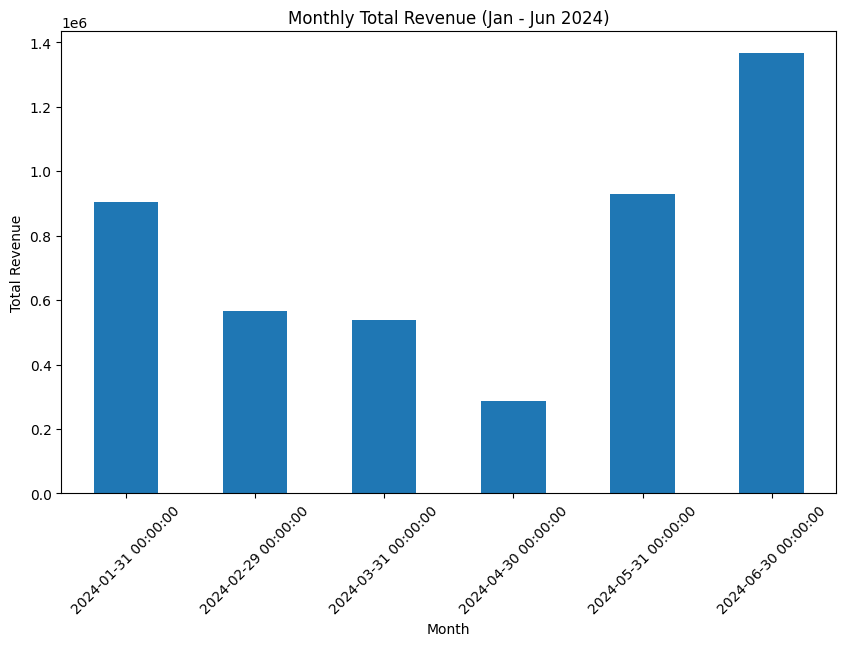

In [109]:
# 2.
filtered = filtered.sort_index()
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-06-30')

period_sales = filtered.loc[start_date:end_date, 'TotalRevenue']
monthly_sales = period_sales.resample('M').sum()
# 시각화
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Total Revenue (Jan - Jun 2024)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Hour
1     11
2      9
3      1
4      2
5      2
6      4
7      8
8      3
9      5
10     6
15     3
17    14
19     2
20     4
22     4
Name: Quantity, dtype: int64


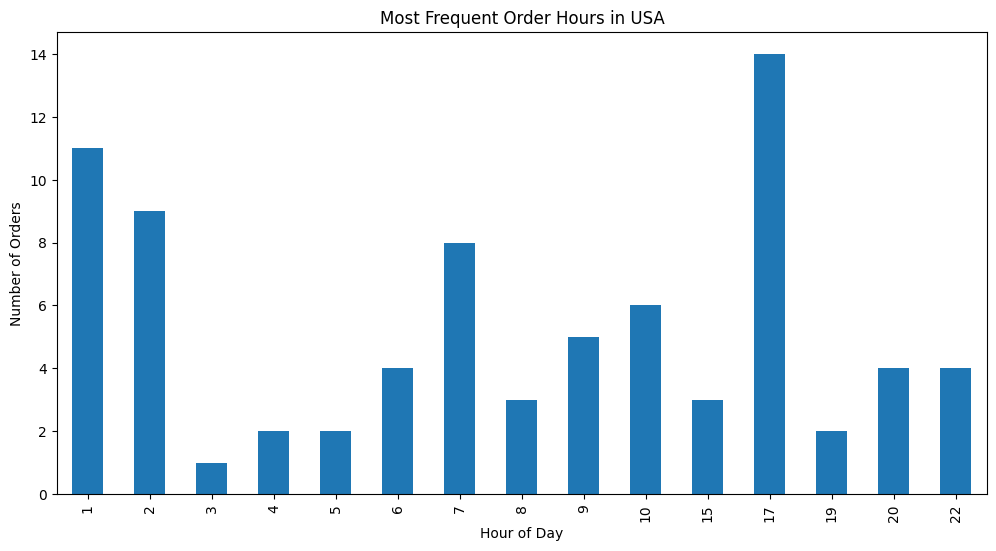

In [117]:
# 3.

# filtered.reset_index(inplace=True)
usa_df = filtered[filtered['Country'] == '미국'].copy()

usa_df['Hour'] = usa_df['OrderDate'].dt.hour

# 시간대별 주문 건수 집계
hourly_orders = usa_df.groupby('Hour')['Quantity'].sum()
print(hourly_orders)
# 시각화
plt.figure(figsize=(12,6))
hourly_orders.plot(kind='bar')
plt.title('Most Frequent Order Hours in USA')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [ ]:
# 1.
order = filtered.groupby('CustomerID')['OrderID'].count()
again = (order >= 2).sum()
total = order.count()
rate = again / total
print(rate)
# 2.
category_discount = filtered.groupby('Category')['DiscountRate'].mean().sort_values(ascending=False)
top = category_discount.index[0]
revenue = filtered[filtered['Category'] == top]['TotalRevenue'].sum()

print("할인율 가장 높은 카테고리 : ")
print(top)

print("해당 카테고리의 총 매출액:")
print(revenue)

0.08181818181818182
1493000
할인율 높은 상위 3개 카테고리 평균 할인율:
Category
Beauty         0.186522
Sports         0.179444
Electronics    0.175789
Name: DiscountRate, dtype: float64

상위 할인 카테고리별 매출액:
Category
Beauty         1493000
Electronics    1746000
Sports         1057000
Name: TotalRevenue, dtype: int64
